In [1]:
from google.colab import drive
drive.mount('/content/drive')

%matplotlib inline


Mounted at /content/drive


In [ ]:
# !ls /content/drive/MyDrive/training_data/quadrant_enumeration/yolo_2048_2048/train/images
# !ls /content/drive/MyDrive/training_data/quadrant_enumeration/yolo_2048_2048/val/images


train_0.png    train_189.png  train_283.png  train_382.png  train_481.png  train_571.png
train_100.png  train_18.png   train_284.png  train_386.png  train_482.png  train_572.png
train_102.png  train_190.png  train_286.png  train_387.png  train_483.png  train_574.png
train_103.png  train_191.png  train_289.png  train_388.png  train_484.png  train_575.png
train_104.png  train_192.png  train_28.png   train_38.png   train_485.png  train_577.png
train_105.png  train_194.png  train_290.png  train_390.png  train_486.png  train_578.png
train_106.png  train_197.png  train_291.png  train_391.png  train_487.png  train_579.png
train_108.png  train_198.png  train_293.png  train_392.png  train_488.png  train_581.png
train_109.png  train_199.png  train_294.png  train_393.png  train_489.png  train_582.png
train_10.png   train_19.png   train_296.png  train_394.png  train_48.png   train_585.png
train_110.png  train_200.png  train_297.png  train_395.png  train_491.png  train_588.png
train_113.png  train_

In [2]:
import os

# Base directory for YOLO data
base_dir = "drive/MyDrive/training_data/quadrant_enumeration/"
yolo_base_dir = "drive/MyDrive/training_data/quadrant_enumeration/yolo_2048_2048"

# Define train and validation directories
# Correct paths to include '/content/'
train_images_dir = "/content/drive/MyDrive/training_data/quadrant_enumeration/yolo_2048_2048/train/images"
train_labels_dir = "/content/drive/MyDrive/training_data/quadrant_enumeration/yolo_2048_2048/train/labels"
val_images_dir = "/content/drive/MyDrive/training_data/quadrant_enumeration/yolo_2048_2048/val/images"
val_labels_dir = "/content/drive/MyDrive/training_data/quadrant_enumeration/yolo_2048_2048/val/labels"
yaml_file_path = "/content/drive/MyDrive/training_data/quadrant_enumeration/yolo_2048_2048/data.yaml"


print(f"Train Images Directory: {train_images_dir}")
print(f"Train Labels Directory: {train_labels_dir}")
print(f"Validation Images Directory: {val_images_dir}")
print(f"Validation Labels Directory: {val_labels_dir}")
print(f"YAML File Path: {yaml_file_path}")


Train Images Directory: /content/drive/MyDrive/training_data/quadrant_enumeration/yolo_2048_2048/train/images
Train Labels Directory: /content/drive/MyDrive/training_data/quadrant_enumeration/yolo_2048_2048/train/labels
Validation Images Directory: /content/drive/MyDrive/training_data/quadrant_enumeration/yolo_2048_2048/val/images
Validation Labels Directory: /content/drive/MyDrive/training_data/quadrant_enumeration/yolo_2048_2048/val/labels
YAML File Path: /content/drive/MyDrive/training_data/quadrant_enumeration/yolo_2048_2048/data.yaml


In [3]:
pip install ultralytics


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 898.8/898.8 kB 22.8 MB/s eta 0:00:00


In [4]:
from ultralytics import YOLO

Creating new Ultralytics Settings v0.0.6 file ✅ 
View Ultralytics Settings with 'yolo settings' or at '/root/.config/Ultralytics/settings.json'
Update Settings with 'yolo settings key=value', i.e. 'yolo settings runs_dir=path/to/dir'. For help see https://docs.ultralytics.com/quickstart/#ultralytics-settings.


In [11]:
# Load a pre-trained YOLOv8 model
model = YOLO('yolov8n.pt')  # Use yolov8n (nano) for faster training, or yolov8s/m/l for better accuracy

# Train the model
model.train(
    data=yaml_file_path,  # Path to YAML configuration
    epochs=20,                # Number of epochs
    imgsz=512,                # Image size (pixels)
    batch=16,                 # Batch size
    device=0,                 # Set device: 0 for GPU, 'cpu' for CPU
    workers=4,                # Number of data loader workers
    name='dental_teeth_model', # Experiment name
    project=yolo_base_dir
)

# Validate the model
metrics = model.val()

madel_path = os.path.join(base_dir, 'dental_teeth_yolov8.pt')
# Save the model
model.save(madel_path)


Ultralytics 8.3.48 🚀 Python-3.10.12 torch-2.5.1+cu121 CUDA:0 (Tesla T4, 15102MiB)
engine/trainer: task=detect, mode=train, model=yolov8n.pt, data=/content/drive/MyDrive/training_data/quadrant_enumeration/yolo_2048_2048/data.yaml, epochs=20, time=None, patience=100, batch=16, imgsz=512, save=True, save_period=-1, cache=False, device=0, workers=4, project=drive/MyDrive/training_data/quadrant_enumeration/yolo_2048_2048, name=dental_teeth_model4, exist_ok=False, pretrained=True, optimizer=auto, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=None, multi_scale=False, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, vid_stride=1, stream_buffer=False, visualize=False, augment=False, agnostic_nms=False, classes=None, retina_masks=False, embed=None,

train: Scanning /content/drive/MyDrive/training_data/quadrant_enumeration/yolo_2048_2048/train/labels.cache... 507 images, 0 backgrounds, 0 corrupt: 100%|██████████| 507/507 [00:00<?, ?it/s]

albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01, num_output_channels=3, method='weighted_average'), CLAHE(p=0.01, clip_limit=(1.0, 4.0), tile_grid_size=(8, 8))



val: Scanning /content/drive/MyDrive/training_data/quadrant_enumeration/yolo_2048_2048/val/labels.cache... 127 images, 0 backgrounds, 0 corrupt: 100%|██████████| 127/127 [00:00<?, ?it/s]


Plotting labels to drive/MyDrive/training_data/quadrant_enumeration/yolo_2048_2048/dental_teeth_model4/labels.jpg... 
optimizer: 'optimizer=auto' found, ignoring 'lr0=0.01' and 'momentum=0.937' and determining best 'optimizer', 'lr0' and 'momentum' automatically... 
optimizer: AdamW(lr=0.000278, momentum=0.9) with parameter groups 57 weight(decay=0.0), 64 weight(decay=0.0005), 63 bias(decay=0.0)
TensorBoard: model graph visualization added ✅
Image sizes 512 train, 512 val
Using 2 dataloader workers
Logging results to drive/MyDrive/training_data/quadrant_enumeration/yolo_2048_2048/dental_teeth_model4
Starting training for 20 epochs...

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       1/20         2G      2.636      5.198      1.713        406        512: 100%|██████████| 32/32 [00:42<00:00,  1.33s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  4.16it/s]

                   all        127       3601          0          0          0          0



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       2/20      2.21G      1.989      4.546      1.234        574        512: 100%|██████████| 32/32 [00:48<00:00,  1.50s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:03<00:00,  1.29it/s]


                   all        127       3601     0.0299      0.296     0.0504     0.0246

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       3/20      1.95G      1.887      3.936      1.169        409        512: 100%|██████████| 32/32 [00:48<00:00,  1.53s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:01<00:00,  2.12it/s]


                   all        127       3601      0.161      0.429     0.0846     0.0376

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       4/20      1.97G      1.868      3.521      1.152        390        512: 100%|██████████| 32/32 [00:46<00:00,  1.45s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:03<00:00,  1.25it/s]


                   all        127       3601      0.247      0.281      0.143     0.0697

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       5/20      2.15G       1.82      3.162      1.153        549        512: 100%|██████████| 32/32 [00:49<00:00,  1.55s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:02<00:00,  1.80it/s]


                   all        127       3601      0.168      0.379      0.171     0.0875

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       6/20      1.98G      1.807      2.909      1.132        460        512: 100%|██████████| 32/32 [00:46<00:00,  1.47s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:02<00:00,  1.53it/s]


                   all        127       3601      0.165      0.446      0.193     0.0967

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       7/20      2.03G      1.817      2.725      1.138        520        512: 100%|██████████| 32/32 [00:49<00:00,  1.54s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:03<00:00,  1.27it/s]

                   all        127       3601      0.217      0.524      0.218      0.117



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       8/20      2.21G      1.768      2.567       1.12        526        512: 100%|██████████| 32/32 [00:47<00:00,  1.47s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:02<00:00,  1.74it/s]


                   all        127       3601       0.21      0.573      0.248      0.136

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       9/20      2.49G      1.715      2.424      1.111        393        512: 100%|██████████| 32/32 [00:49<00:00,  1.54s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:04<00:00,  1.05s/it]


                   all        127       3601      0.234      0.548      0.287      0.155

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      10/20      2.34G      1.717      2.339      1.112        457        512: 100%|██████████| 32/32 [00:47<00:00,  1.47s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:02<00:00,  1.85it/s]


                   all        127       3601       0.25      0.575        0.3      0.165
Closing dataloader mosaic
albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01, num_output_channels=3, method='weighted_average'), CLAHE(p=0.01, clip_limit=(1.0, 4.0), tile_grid_size=(8, 8))

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      11/20      1.46G       1.68      2.124      1.165        309        512: 100%|██████████| 32/32 [00:55<00:00,  1.73s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:02<00:00,  1.75it/s]


                   all        127       3601      0.261      0.607       0.31      0.171

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      12/20       1.4G      1.604      2.052       1.15        275        512: 100%|██████████| 32/32 [00:46<00:00,  1.45s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:03<00:00,  1.08it/s]


                   all        127       3601      0.257      0.649      0.334      0.183

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      13/20      1.42G       1.59      1.988      1.141        321        512: 100%|██████████| 32/32 [00:47<00:00,  1.47s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:02<00:00,  1.59it/s]

                   all        127       3601      0.306      0.651      0.357      0.195



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      14/20      1.46G      1.572       1.94      1.144        304        512: 100%|██████████| 32/32 [00:45<00:00,  1.43s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:02<00:00,  1.53it/s]


                   all        127       3601      0.304      0.684       0.38       0.21

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      15/20       1.4G      1.554      1.906      1.132        308        512: 100%|██████████| 32/32 [00:48<00:00,  1.53s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:02<00:00,  1.94it/s]

                   all        127       3601      0.326      0.663      0.392      0.214



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      16/20      1.46G      1.553      1.877      1.139        317        512: 100%|██████████| 32/32 [00:46<00:00,  1.45s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:03<00:00,  1.19it/s]


                   all        127       3601      0.333      0.675      0.389      0.205

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      17/20       1.4G      1.549      1.849      1.132        310        512: 100%|██████████| 32/32 [00:49<00:00,  1.53s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:02<00:00,  1.88it/s]


                   all        127       3601      0.335       0.68      0.397      0.219

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      18/20       1.4G       1.55      1.818      1.126        315        512: 100%|██████████| 32/32 [00:45<00:00,  1.41s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:03<00:00,  1.15it/s]


                   all        127       3601      0.343      0.689       0.41      0.224

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      19/20      1.46G      1.519      1.811      1.122        324        512: 100%|██████████| 32/32 [00:48<00:00,  1.52s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:02<00:00,  1.80it/s]

                   all        127       3601      0.357      0.694      0.418      0.227



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      20/20      1.43G      1.538      1.809      1.126        324        512: 100%|██████████| 32/32 [00:45<00:00,  1.43s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:03<00:00,  1.08it/s]


                   all        127       3601      0.355      0.684      0.421       0.23

20 epochs completed in 0.301 hours.
Optimizer stripped from drive/MyDrive/training_data/quadrant_enumeration/yolo_2048_2048/dental_teeth_model4/weights/last.pt, 6.2MB
Optimizer stripped from drive/MyDrive/training_data/quadrant_enumeration/yolo_2048_2048/dental_teeth_model4/weights/best.pt, 6.2MB

Validating drive/MyDrive/training_data/quadrant_enumeration/yolo_2048_2048/dental_teeth_model4/weights/best.pt...
Ultralytics 8.3.48 🚀 Python-3.10.12 torch-2.5.1+cu121 CUDA:0 (Tesla T4, 15102MiB)
Model summary (fused): 168 layers, 3,011,888 parameters, 0 gradients, 8.1 GFLOPs


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:08<00:00,  2.08s/it]


                   all        127       3601      0.355      0.684      0.421       0.23
                    11        125        125      0.425      0.864      0.459       0.25
                    12        123        123      0.475     0.0813      0.274      0.128
                    13        123        123       0.41      0.163      0.303      0.126
                    14        116        116      0.269      0.172      0.196     0.0725
                    15        115        115      0.288      0.391      0.296      0.154
                    16        118        118      0.346      0.847      0.458      0.263
                    17        115        115      0.338      0.913      0.441      0.286
                    18         67         67      0.354      0.806      0.543      0.289
                    21        125        125      0.331      0.848      0.473      0.245
                    22        124        125      0.239       0.36      0.245      0.123
                    2

val: Scanning /content/drive/MyDrive/training_data/quadrant_enumeration/yolo_2048_2048/val/labels.cache... 127 images, 0 backgrounds, 0 corrupt: 100%|██████████| 127/127 [00:00<?, ?it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:15<00:00,  1.90s/it]


                   all        127       3601      0.355      0.687      0.421      0.231
                    11        125        125      0.426      0.872      0.459      0.247
                    12        123        123      0.475     0.0894      0.274      0.129
                    13        123        123      0.413      0.166      0.303      0.125
                    14        116        116      0.267      0.172      0.197     0.0735
                    15        115        115      0.285      0.391      0.296      0.155
                    16        118        118      0.345      0.847       0.46      0.266
                    17        115        115      0.337      0.913      0.442      0.284
                    18         67         67      0.353      0.806      0.539      0.291
                    21        125        125      0.329      0.848      0.471      0.244
                    22        124        125      0.238       0.36      0.245      0.125
                    2

In [ ]:
!ls /content/runs/detect/dental_teeth_model2


ls: cannot access '/content/runs/detect/dental_teeth_model2': No such file or directory


In [ ]:
model = YOLO('dental_teeth_yolov8.pt')

FileNotFoundError: [Errno 2] No such file or directory: 'dental_teeth_yolov8.pt'

In [7]:
import cv2
import numpy as np
from PIL import Image, ImageDraw
import matplotlib.pyplot as plt

def visualize_yolo_predictions(model, image_path, conf_threshold=0.25, show_conf=True):
    """
    Visualize YOLO model predictions on an image.

    Args:
        model: Loaded YOLO model
        image_path (str): Path to the image file
        conf_threshold (float): Confidence threshold for predictions (0-1)
        show_conf (bool): Whether to show confidence scores on the boxes
    """
    # Make predictions
    results = model.predict(image_path, conf=conf_threshold, verbose=False)[0]

    # Load image for visualization
    image = cv2.imread(image_path)
    image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

    # Generate colors for different classes
    np.random.seed(42)  # for consistent colors
    colors = np.random.randint(0, 255, size=(32, 3), dtype=np.uint8)  # 32 different colors

    # Get image dimensions
    height, width = image.shape[:2]

    # Create figure and axes
    plt.figure(figsize=(12, 8))

    # Draw boxes
    for box in results.boxes:
        # Get box coordinates
        x1, y1, x2, y2 = map(int, box.xyxy[0])

        # Get class and confidence
        class_id = int(box.cls[0])
        confidence = float(box.conf[0])

        # Get color for this class
        color = tuple(map(int, colors[class_id]))

        # Draw rectangle
        cv2.rectangle(image, (x1, y1), (x2, y2), color, 2)

        # Create label with class and confidence
        label = f"Tooth {class_id}"
        if show_conf:
            label += f" {confidence:.2f}"

        # Calculate text size and position
        font = cv2.FONT_HERSHEY_SIMPLEX
        font_scale = 0.5
        thickness = 1
        (text_width, text_height), baseline = cv2.getTextSize(label, font, font_scale, thickness)

        # Draw label background
        cv2.rectangle(image, (x1, y1 - text_height - baseline - 5),
                     (x1 + text_width, y1), color, -1)

        # Draw text
        cv2.putText(image, label, (x1, y1 - baseline - 5),
                    font, font_scale, (255, 255, 255), thickness)

    # Show image with predictions
    plt.imshow(image)
    plt.axis('off')
    plt.title('YOLO Teeth Detection')
    plt.tight_layout()
    plt.show()

    # Print detection summary
    total_detections = len(results.boxes)
    print(f"\nDetection Summary:")
    print(f"Total teeth detected: {total_detections}")

    # Count detections by class
    class_counts = {}
    for box in results.boxes:
        class_id = int(box.cls[0])
        class_counts[class_id] = class_counts.get(class_id, 0) + 1

    print("\nDetections by tooth number:")
    for class_id, count in sorted(class_counts.items()):
        print(f"Tooth {class_id}: {count} detection(s)")

    return results

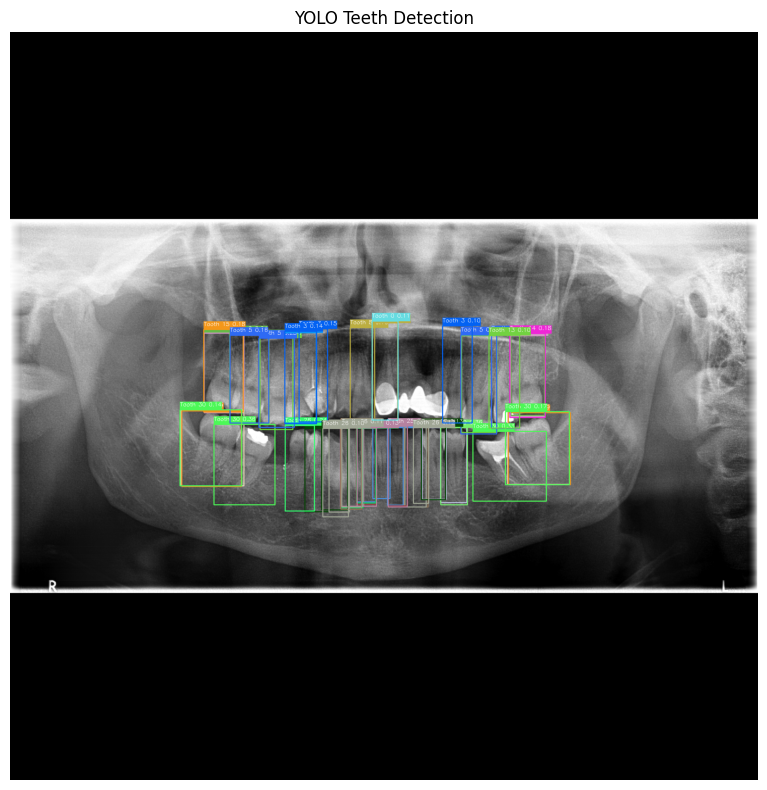


Detection Summary:
Total teeth detected: 53

Detections by tooth number:
Tooth 0: 1 detection(s)
Tooth 3: 3 detection(s)
Tooth 4: 1 detection(s)
Tooth 5: 4 detection(s)
Tooth 6: 3 detection(s)
Tooth 7: 2 detection(s)
Tooth 8: 2 detection(s)
Tooth 13: 3 detection(s)
Tooth 14: 1 detection(s)
Tooth 15: 1 detection(s)
Tooth 16: 3 detection(s)
Tooth 17: 2 detection(s)
Tooth 18: 2 detection(s)
Tooth 19: 2 detection(s)
Tooth 20: 1 detection(s)
Tooth 23: 2 detection(s)
Tooth 24: 2 detection(s)
Tooth 25: 3 detection(s)
Tooth 26: 5 detection(s)
Tooth 27: 3 detection(s)
Tooth 28: 1 detection(s)
Tooth 30: 4 detection(s)
Tooth 31: 2 detection(s)


In [12]:
# Load the model
# model = YOLO('dental_teeth_yolov8.pt')
# model.val()
image_path = os.path.join(yolo_base_dir,"val/images/train_210.png")
# Visualize predictions on an image
results = visualize_yolo_predictions(
    model=model,
    image_path=image_path,
    conf_threshold=0.1,  # Adjust confidence threshold as needed
    show_conf=True       # Set to False to hide confidence scores
)

In [58]:
import cv2
import numpy as np
from PIL import Image, ImageDraw
import matplotlib.pyplot as plt
import json

def add_noise_to_mask(mask, noise_factor=100, blur_size=10):
    """
    Add noise and blur to mask edges.
    """
    # Find edges
    edges = cv2.Canny(mask, 100, 200)

    # Add Gaussian blur to edges
    blurred_edges = cv2.GaussianBlur(edges, (blur_size, blur_size), 0)

    # Create noise only around edges
    noise = np.random.normal(0, 1, mask.shape).astype(np.float32)
    noise = cv2.GaussianBlur(noise, (blur_size, blur_size), 0)

    # Combine original mask with noise around edges
    result = mask.copy().astype(np.float32)
    edge_mask = blurred_edges > 0
    result[edge_mask] = result[edge_mask] * (1 - noise_factor) + noise[edge_mask] * noise_factor

    # Normalize and convert back to uint8
    result = np.clip(result, 0, 255).astype(np.uint8)

    return result

def visualize_yolo_and_masks(model, image_path, coco_json, conf_threshold=0.25,
                            show_conf=True, mask_alpha=0.5, noise_factor=0.3, blur_size=3):
    """
    Visualize YOLO predictions and noisy ground truth segmentation masks on an image.
    """
    # Load COCO annotations
    with open(coco_json, 'r') as f:
        coco_data = json.load(f)

    # Get image filename from path
    image_filename = image_path.split('/')[-1]

    # Find image in COCO annotations
    image_info = None
    for img in coco_data['images']:
        if img['file_name'] == image_filename:
            image_info = img
            break

    if image_info is None:
        raise ValueError(f"Image {image_filename} not found in COCO annotations")

    # Get annotations for this image
    image_annotations = []
    for ann in coco_data['annotations']:
        if ann['image_id'] == image_info['id']:
            image_annotations.append(ann)

    # Make YOLO predictions
    results = model.predict(image_path, conf=conf_threshold, verbose=False)[0]

    # Load image for visualization
    image = cv2.imread(image_path)
    image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
    height, width = image.shape[:2]

    # Create mask overlay
    mask_overlay = np.zeros_like(image, dtype=np.uint8)

    # Generate colors for different classes
    np.random.seed(42)  # for consistent colors
    colors = np.random.randint(0, 255, size=(32, 3), dtype=np.uint8)

    # Draw segmentation masks
    for ann in image_annotations:
        # Get segmentation points and category
        points = np.array(ann['segmentation']).reshape(-1, 2)
        category_id = ann['category_id']
        color = colors[category_id]

        # Create mask for this annotation
        mask = np.zeros((height, width), dtype=np.uint8)
        points = points.reshape((-1, 1, 2)).astype(np.int32)
        cv2.fillPoly(mask, [points], 255)  # Fill with 255 for better noise visibility

        # Add noise and blur to mask
        noisy_mask = add_noise_to_mask(mask, noise_factor, blur_size)

        # Create colored mask
        colored_mask = np.zeros_like(image)
        mask_bool = noisy_mask > 127  # Convert to boolean mask
        colored_mask[mask_bool] = color

        # Add to overlay
        mask_overlay = cv2.addWeighted(mask_overlay, 1, colored_mask, 1, 0)

    # Blend mask with original image
    image_with_masks = cv2.addWeighted(image, 1, mask_overlay, mask_alpha, 0)

    # Create figure with two subplots
    plt.figure(figsize=(20, 8))

    # Plot original image with YOLO boxes
    plt.subplot(1, 2, 1)
    plt.title('YOLO Detections with Noisy Segmentations')

    # Draw YOLO boxes
    image_with_boxes = image_with_masks.copy()
    for box in results.boxes:
        # Get box coordinates
        x1, y1, x2, y2 = map(int, box.xyxy[0])

        # Get class and confidence
        class_id = int(box.cls[0])
        confidence = float(box.conf[0])

        # Get color for this class
        color = tuple(map(int, colors[class_id]))

        # Draw rectangle
        cv2.rectangle(image_with_boxes, (x1, y1), (x2, y2), color, 2)

        # Create label
        label = f"Tooth {class_id}"
        if show_conf:
            label += f" {confidence:.2f}"

        # Calculate text size
        font = cv2.FONT_HERSHEY_SIMPLEX
        font_scale = 0.5
        thickness = 1
        (text_width, text_height), baseline = cv2.getTextSize(label, font, font_scale, thickness)

        # Draw label background
        cv2.rectangle(image_with_boxes, (x1, y1 - text_height - baseline - 5),
                     (x1 + text_width, y1), color, -1)

        # Draw text
        cv2.putText(image_with_boxes, label, (x1, y1 - baseline - 5),
                    font, font_scale, (255, 255, 255), thickness)

    plt.imshow(image_with_boxes)
    plt.axis('off')

    # Plot ground truth segmentations only
    plt.subplot(1, 2, 2)
    plt.title('Noisy Ground Truth Segmentations')
    plt.imshow(image_with_masks)
    plt.axis('off')

    plt.tight_layout()
    plt.show()

    # Print detection summary
    print("\nDetection Summary:")
    print(f"Total YOLO detections: {len(results.boxes)}")
    print(f"Total ground truth annotations: {len(image_annotations)}")

    # Count YOLO detections by class
    yolo_class_counts = {}
    for box in results.boxes:
        class_id = int(box.cls[0])
        yolo_class_counts[class_id] = yolo_class_counts.get(class_id, 0) + 1

    # Count ground truth annotations by class
    gt_class_counts = {}
    for ann in image_annotations:
        class_id = ann['category_id']
        gt_class_counts[class_id] = gt_class_counts.get(class_id, 0) + 1

    print("\nYOLO Detections by tooth number:")
    for class_id, count in sorted(yolo_class_counts.items()):
        print(f"Tooth {class_id}: {count} detection(s)")

    print("\nGround Truth Annotations by tooth number:")
    for class_id, count in sorted(gt_class_counts.items()):
        print(f"Tooth {class_id}: {count} annotation(s)")

    return results, image_annotations

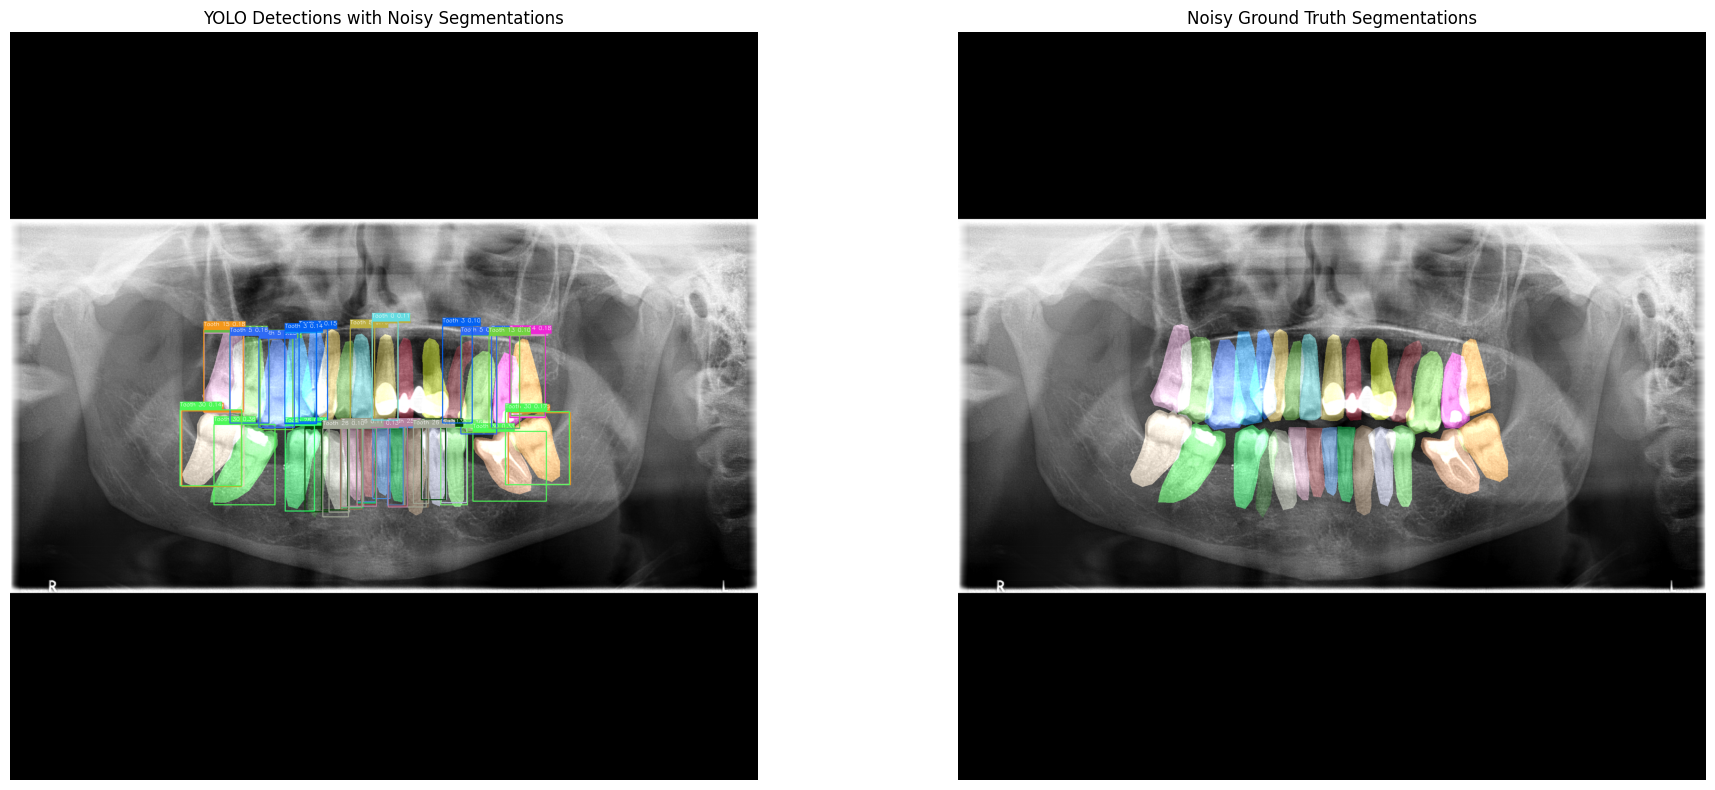


Detection Summary:
Total YOLO detections: 53
Total ground truth annotations: 29

YOLO Detections by tooth number:
Tooth 0: 1 detection(s)
Tooth 3: 3 detection(s)
Tooth 4: 1 detection(s)
Tooth 5: 4 detection(s)
Tooth 6: 3 detection(s)
Tooth 7: 2 detection(s)
Tooth 8: 2 detection(s)
Tooth 13: 3 detection(s)
Tooth 14: 1 detection(s)
Tooth 15: 1 detection(s)
Tooth 16: 3 detection(s)
Tooth 17: 2 detection(s)
Tooth 18: 2 detection(s)
Tooth 19: 2 detection(s)
Tooth 20: 1 detection(s)
Tooth 23: 2 detection(s)
Tooth 24: 2 detection(s)
Tooth 25: 3 detection(s)
Tooth 26: 5 detection(s)
Tooth 27: 3 detection(s)
Tooth 28: 1 detection(s)
Tooth 30: 4 detection(s)
Tooth 31: 2 detection(s)

Ground Truth Annotations by tooth number:
Tooth 0: 1 annotation(s)
Tooth 1: 1 annotation(s)
Tooth 2: 1 annotation(s)
Tooth 3: 1 annotation(s)
Tooth 4: 1 annotation(s)
Tooth 5: 1 annotation(s)
Tooth 6: 1 annotation(s)
Tooth 7: 1 annotation(s)
Tooth 8: 1 annotation(s)
Tooth 9: 1 annotation(s)
Tooth 11: 1 annotation(s

In [61]:
image_path = os.path.join(yolo_base_dir,"val/images/train_210.png")
coco_json = os.path.join(base_dir,"coco_quadrant_enumeration_2048_2048.json")

# Visualize predictions and ground truth
results, annotations = visualize_yolo_and_masks(
    model=model,
    image_path=image_path,
    coco_json=coco_json,
    conf_threshold=0.1,
    show_conf=True,
    mask_alpha=0.5  # Adjust transparency of segmentation masks
)

In [13]:
import numpy as np
import torch
from tqdm import tqdm
from collections import defaultdict

def calculate_coco_metrics(model, val_loader, num_classes=32):
    """
    Calculate COCO-style metrics for YOLO model.

    Args:
        model: YOLO model
        val_loader: Validation data loader
        num_classes: Number of classes (default: 32 for teeth)

    Returns:
        dict: Dictionary containing AP and AR metrics
    """
    # Define IoU thresholds
    iou_thresholds = np.linspace(.5, .95, 10)  # [0.5, 0.55, ..., 0.95]

    # Initialize storage for predictions and ground truth
    class_predictions = defaultdict(list)
    class_ground_truths = defaultdict(list)

    print("Collecting predictions and ground truth...")
    model.eval()
    with torch.no_grad():
        for batch_images, batch_targets in tqdm(val_loader):
            # Get predictions
            results = model(batch_images)

            # Process each image in the batch
            for idx, result in enumerate(results):
                # Get ground truth boxes and classes for this image
                gt_boxes = batch_targets[idx]['boxes']
                gt_classes = batch_targets[idx]['labels']

                # Get predicted boxes, scores, and classes
                pred_boxes = result.boxes.xyxy
                pred_scores = result.boxes.conf
                pred_classes = result.boxes.cls

                # Store predictions and ground truth for each class
                for class_idx in range(num_classes):
                    # Get predictions for this class
                    class_mask = pred_classes == class_idx
                    class_preds = {
                        'boxes': pred_boxes[class_mask],
                        'scores': pred_scores[class_mask]
                    }

                    # Get ground truth for this class
                    gt_mask = gt_classes == class_idx
                    class_gt = {
                        'boxes': gt_boxes[gt_mask]
                    }

                    class_predictions[class_idx].append(class_preds)
                    class_ground_truths[class_idx].append(class_gt)

    # Calculate metrics
    ap_per_class = defaultdict(dict)
    ar_per_class = defaultdict(dict)

    print("\nCalculating metrics...")
    for class_idx in range(num_classes):
        # Calculate AP at different IoU thresholds
        aps = []
        ars = []

        for iou_thresh in iou_thresholds:
            ap, ar = calculate_ap_ar(
                class_predictions[class_idx],
                class_ground_truths[class_idx],
                iou_threshold=iou_thresh
            )
            aps.append(ap)
            ars.append(ar)

        # Store results for this class
        ap_per_class[class_idx] = {
            'AP50': aps[0],  # AP at IoU=0.50
            'AP75': aps[5],  # AP at IoU=0.75
            'AP': np.mean(aps)  # AP averaged over IoU range
        }

        ar_per_class[class_idx] = {
            'AR50': ars[0],  # AR at IoU=0.50
            'AR75': ars[5],  # AR at IoU=0.75
            'AR': np.mean(ars)  # AR averaged over IoU range
        }

    # Calculate mean metrics across all classes
    metrics = {
        'AP50': np.mean([ap['AP50'] for ap in ap_per_class.values()]),
        'AP75': np.mean([ap['AP75'] for ap in ap_per_class.values()]),
        'AP': np.mean([ap['AP'] for ap in ap_per_class.values()]),  # mAP@.5:.95
        'AR50': np.mean([ar['AR50'] for ar in ar_per_class.values()]),
        'AR75': np.mean([ar['AR75'] for ar in ar_per_class.values()]),
        'AR': np.mean([ar['AR'] for ar in ar_per_class.values()]),  # mAR@.5:.95
        'per_class_AP': ap_per_class,
        'per_class_AR': ar_per_class
    }

    # Print summary
    print("\nCOCO-style Metrics Summary:")
    print(f"AP@.5:.95 = {metrics['AP']:.4f}")
    print(f"AP@.50    = {metrics['AP50']:.4f}")
    print(f"AP@.75    = {metrics['AP75']:.4f}")
    print(f"AR@.5:.95 = {metrics['AR']:.4f}")
    print(f"AR@.50    = {metrics['AR50']:.4f}")
    print(f"AR@.75    = {metrics['AR75']:.4f}")

    return metrics

def calculate_ap_ar(predictions, ground_truths, iou_threshold=0.5):
    """
    Calculate Average Precision and Average Recall for a single class at a specific IoU threshold.
    """
    # Collect all predictions and sort by confidence
    all_predictions = []
    all_scores = []

    for pred in predictions:
        boxes = pred['boxes']
        scores = pred['scores']
        all_predictions.extend(boxes)
        all_scores.extend(scores)

    # Convert to numpy for easier processing
    all_predictions = torch.stack(all_predictions) if all_predictions else torch.zeros((0, 4))
    all_scores = torch.stack(all_scores) if all_scores else torch.zeros(0)

    # Sort predictions by confidence
    score_sort = torch.argsort(all_scores, descending=True)
    all_predictions = all_predictions[score_sort]
    all_scores = all_scores[score_sort]

    # Count total ground truth boxes
    total_gt = sum(len(gt['boxes']) for gt in ground_truths)

    if total_gt == 0:
        return 0.0, 0.0  # No ground truth boxes

    # Calculate precision and recall points
    tp = np.zeros(len(all_predictions))
    fp = np.zeros(len(all_predictions))
    gt_matched = [np.zeros(len(gt['boxes'])) for gt in ground_truths]

    # Match predictions to ground truth
    for pred_idx, pred_box in enumerate(all_predictions):
        max_iou = -np.inf
        match_gt_idx = -1
        match_gt_box_idx = -1

        # Check each image's ground truth
        for gt_idx, gt in enumerate(ground_truths):
            if len(gt['boxes']) == 0:
                continue

            # Calculate IoUs with ground truth boxes
            ious = box_iou(pred_box.unsqueeze(0), gt['boxes'])[0]
            max_iou_gt = torch.max(ious)
            if max_iou_gt > max_iou and max_iou_gt >= iou_threshold:
                max_iou = max_iou_gt
                match_gt_idx = gt_idx
                match_gt_box_idx = torch.argmax(ious)

        if match_gt_idx >= 0 and gt_matched[match_gt_idx][match_gt_box_idx] == 0:
            tp[pred_idx] = 1
            gt_matched[match_gt_idx][match_gt_box_idx] = 1
        else:
            fp[pred_idx] = 1

    # Calculate precision and recall
    tp_cumsum = np.cumsum(tp)
    fp_cumsum = np.cumsum(fp)
    recalls = tp_cumsum / total_gt
    precisions = tp_cumsum / (tp_cumsum + fp_cumsum)

    # Calculate AP
    ap = 0.0
    for t in np.arange(0.0, 1.1, 0.1):
        if np.sum(recalls >= t) == 0:
            p = 0
        else:
            p = np.max(precisions[recalls >= t])
        ap = ap + p / 11.0

    # Calculate AR
    if len(recalls) > 0:
        ar = recalls[-1]
    else:
        ar = 0.0

    return ap, ar

def box_iou(box1, box2):
    """
    Calculate IoU between two sets of boxes.
    """
    area1 = (box1[:, 2] - box1[:, 0]) * (box1[:, 3] - box1[:, 1])
    area2 = (box2[:, 2] - box2[:, 0]) * (box2[:, 3] - box2[:, 1])

    lt = torch.max(box1[:, None, :2], box2[:, :2])
    rb = torch.min(box1[:, None, 2:], box2[:, 2:])

    wh = (rb - lt).clamp(min=0)
    inter = wh[:, :, 0] * wh[:, :, 1]

    union = area1[:, None] + area2 - inter

    return inter / union

In [ ]:
# Load your model and validation dataloader
# model = YOLO('dental_teeth_yolov8.pt')

# Calculate metrics
metrics = calculate_coco_metrics(
    model=model,
    val_loader=val_loader,
    num_classes=32  # Number of tooth classes
)

# Access specific metrics
print(f"AP (.5-.95) = {metrics['AP']:.4f}")  # Mean AP across IoU thresholds
print(f"AR (.5-.95) = {metrics['AR']:.4f}")  # Mean AR across IoU thresholds
print(f"AP50        = {metrics['AP50']:.4f}")  # AP at IoU=0.50
print(f"AP75        = {metrics['AP75']:.4f}")  # AP at IoU=0.75

# Access per-class metrics if needed
class_id = 0  # For example, first tooth class
class_ap = metrics['per_class_AP'][class_id]
print(f"\nClass {class_id} metrics:")
print(f"AP (.5-.95) = {class_ap['AP']:.4f}")
print(f"AP50        = {class_ap['AP50']:.4f}")
print(f"AP75        = {class_ap['AP75']:.4f}")

In [14]:
model.val()

Ultralytics 8.3.48 🚀 Python-3.10.12 torch-2.5.1+cu121 CUDA:0 (Tesla T4, 15102MiB)


val: Scanning /content/drive/MyDrive/training_data/quadrant_enumeration/yolo_2048_2048/val/labels.cache... 127 images, 0 backgrounds, 0 corrupt: 100%|██████████| 127/127 [00:00<?, ?it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:17<00:00,  2.25s/it]


                   all        127       3601      0.355      0.687      0.421      0.231
                    11        125        125      0.426      0.872      0.459      0.247
                    12        123        123      0.475     0.0894      0.274      0.129
                    13        123        123      0.413      0.166      0.303      0.125
                    14        116        116      0.267      0.172      0.197     0.0735
                    15        115        115      0.285      0.391      0.296      0.155
                    16        118        118      0.345      0.847       0.46      0.266
                    17        115        115      0.337      0.913      0.442      0.284
                    18         67         67      0.353      0.806      0.539      0.291
                    21        125        125      0.329      0.848      0.471      0.244
                    22        124        125      0.238       0.36      0.245      0.125
                    2

ultralytics.utils.metrics.DetMetrics object with attributes:

ap_class_index: array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31])
box: ultralytics.utils.metrics.Metric object
confusion_matrix: <ultralytics.utils.metrics.ConfusionMatrix object at 0x7cde4581c6a0>
curves: ['Precision-Recall(B)', 'F1-Confidence(B)', 'Precision-Confidence(B)', 'Recall-Confidence(B)']
curves_results: [[array([          0,    0.001001,    0.002002,    0.003003,    0.004004,    0.005005,    0.006006,    0.007007,    0.008008,    0.009009,     0.01001,    0.011011,    0.012012,    0.013013,    0.014014,    0.015015,    0.016016,    0.017017,    0.018018,    0.019019,     0.02002,    0.021021,    0.022022,    0.023023,
          0.024024,    0.025025,    0.026026,    0.027027,    0.028028,    0.029029,     0.03003,    0.031031,    0.032032,    0.033033,    0.034034,    0.035035,    0.036036,    0.037037,    0.038038,    0.039039,

In [15]:
results = model.val()



Ultralytics 8.3.48 🚀 Python-3.10.12 torch-2.5.1+cu121 CUDA:0 (Tesla T4, 15102MiB)


val: Scanning /content/drive/MyDrive/training_data/quadrant_enumeration/yolo_2048_2048/val/labels.cache... 127 images, 0 backgrounds, 0 corrupt: 100%|██████████| 127/127 [00:00<?, ?it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:14<00:00,  1.86s/it]


                   all        127       3601      0.355      0.687      0.421      0.231
                    11        125        125      0.426      0.872      0.459      0.247
                    12        123        123      0.475     0.0894      0.274      0.129
                    13        123        123      0.413      0.166      0.303      0.125
                    14        116        116      0.267      0.172      0.197     0.0735
                    15        115        115      0.285      0.391      0.296      0.155
                    16        118        118      0.345      0.847       0.46      0.266
                    17        115        115      0.337      0.913      0.442      0.284
                    18         67         67      0.353      0.806      0.539      0.291
                    21        125        125      0.329      0.848      0.471      0.244
                    22        124        125      0.238       0.36      0.245      0.125
                    2

AttributeError: 'Metric' object has no attribute 'mar'. See valid attributes below.

    Class for computing evaluation metrics for YOLOv8 model.

    Attributes:
        p (list): Precision for each class. Shape: (nc,).
        r (list): Recall for each class. Shape: (nc,).
        f1 (list): F1 score for each class. Shape: (nc,).
        all_ap (list): AP scores for all classes and all IoU thresholds. Shape: (nc, 10).
        ap_class_index (list): Index of class for each AP score. Shape: (nc,).
        nc (int): Number of classes.

    Methods:
        ap50(): AP at IoU threshold of 0.5 for all classes. Returns: List of AP scores. Shape: (nc,) or [].
        ap(): AP at IoU thresholds from 0.5 to 0.95 for all classes. Returns: List of AP scores. Shape: (nc,) or [].
        mp(): Mean precision of all classes. Returns: Float.
        mr(): Mean recall of all classes. Returns: Float.
        map50(): Mean AP at IoU threshold of 0.5 for all classes. Returns: Float.
        map75(): Mean AP at IoU threshold of 0.75 for all classes. Returns: Float.
        map(): Mean AP at IoU thresholds from 0.5 to 0.95 for all classes. Returns: Float.
        mean_results(): Mean of results, returns mp, mr, map50, map.
        class_result(i): Class-aware result, returns p[i], r[i], ap50[i], ap[i].
        maps(): mAP of each class. Returns: Array of mAP scores, shape: (nc,).
        fitness(): Model fitness as a weighted combination of metrics. Returns: Float.
        update(results): Update metric attributes with new evaluation results.
    

In [16]:
results.box.map

0.2305598289946099

In [17]:
results.box.map50

0.4214388346759258

In [18]:
results.box.map75

0.22325145786523287

In [27]:
results.box.mr

0.6873099365100506

In [ ]:
# Load the trained model


# Predict bounding boxes for a new image
path_to_image = "drive/MyDrive/training_data/quadrant_enumeration/xrays_2048_2048/train_0.png"
results = model.predict(path_to_image, save=True, conf=0.5)

# Visualize results
results.show()




image 1/1 /content/drive/MyDrive/training_data/quadrant_enumeration/xrays_2048_2048/train_0.png: 640x640 (no detections), 10.4ms
Speed: 5.5ms preprocess, 10.4ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)
Results saved to runs/detect/predict


AttributeError: 'list' object has no attribute 'show'

In [ ]:
metrics

ultralytics.utils.metrics.DetMetrics object with attributes:

ap_class_index: array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31])
box: ultralytics.utils.metrics.Metric object
confusion_matrix: <ultralytics.utils.metrics.ConfusionMatrix object at 0x7d1784893d30>
curves: ['Precision-Recall(B)', 'F1-Confidence(B)', 'Precision-Confidence(B)', 'Recall-Confidence(B)']
curves_results: [[array([          0,    0.001001,    0.002002,    0.003003,    0.004004,    0.005005,    0.006006,    0.007007,    0.008008,    0.009009,     0.01001,    0.011011,    0.012012,    0.013013,    0.014014,    0.015015,    0.016016,    0.017017,    0.018018,    0.019019,     0.02002,    0.021021,    0.022022,    0.023023,
          0.024024,    0.025025,    0.026026,    0.027027,    0.028028,    0.029029,     0.03003,    0.031031,    0.032032,    0.033033,    0.034034,    0.035035,    0.036036,    0.037037,    0.038038,    0.039039,

In [30]:
import torch
import torch.nn as nn
import torch.nn.functional as F





class BBConvLayer(nn.Module):
    """Bounding Box Processing Layer with Channel Reduction."""
    def __init__(self, in_channels, out_channels, reduce_channels=128):
        super(BBConvLayer, self).__init__()
        self.bb_conv = nn.Sequential(
            nn.Conv2d(in_channels, out_channels, kernel_size=3, padding=1),
            nn.ReLU(inplace=True),
            nn.MaxPool2d(kernel_size=2),
            nn.Conv2d(out_channels, reduce_channels, kernel_size=1)  # Reduce channels
        )

    def forward(self, x):
        return self.bb_conv(x)



class ModifiedUNet(nn.Module):
    def __init__(self, image_channels=1, bbox_channels=1, out_channels=33):  # in_channels=2 for image + bbox info
        super(ModifiedUNet, self).__init__()

        def conv_block(in_channels, out_channels):
            return nn.Sequential(
                nn.Conv2d(in_channels, out_channels, kernel_size=3, padding=1),
                nn.ReLU(inplace=True),
                nn.Conv2d(out_channels, out_channels, kernel_size=3, padding=1),
                nn.ReLU(inplace=True),
            )

        def up_block(in_channels, out_channels):
            return nn.ConvTranspose2d(in_channels, out_channels, kernel_size=2, stride=2)

        # Note: in_channels is now 2 (grayscale image + bbox mask)
        self.encoder1 = conv_block(image_channels, 64)
        self.encoder2 = conv_block(64, 128)
        self.encoder3 = conv_block(128, 256)
        self.encoder4 = conv_block(256, 512)

        self.pool = nn.MaxPool2d(kernel_size=2, stride=2)

        self.bottleneck = conv_block(512, 1024)

        self.bb_processing = BBConvLayer(bbox_channels, 512)

        self.upconv4 = up_block(1024, 512)
        self.decoder4 = conv_block(512 + 512 + 128, 512)  # Adjust input channels
        self.upconv3 = up_block(512, 256)
        self.decoder3 = conv_block(256 + 256 + 128, 256)
        self.upconv2 = up_block(256, 128)
        self.decoder2 = conv_block(128 + 128 + 128, 128)
        self.upconv1 = up_block(128, 64)
        self.decoder1 = conv_block(64 + 64 + 128, 64)

        self.final_conv = nn.Conv2d(64, out_channels, kernel_size=1)

    def forward(self, image, bbox):
        # Encoder
        enc1 = self.encoder1(image)
        enc2 = self.encoder2(self.pool(enc1))
        enc3 = self.encoder3(self.pool(enc2))
        enc4 = self.encoder4(self.pool(enc3))

        # Process bounding box features
        bbox_features = self.bb_processing(bbox)

        # Bottleneck
        bottleneck = self.bottleneck(self.pool(enc4))

        # Decoder with resizing bbox_features
        dec4 = self.upconv4(bottleneck)
        bbox_resized4 = F.interpolate(bbox_features, size=enc4.size()[2:], mode='bilinear', align_corners=False)
        dec4 = self.decoder4(torch.cat((dec4, enc4, bbox_resized4), dim=1))

        dec3 = self.upconv3(dec4)
        bbox_resized3 = F.interpolate(bbox_features, size=enc3.size()[2:], mode='bilinear', align_corners=False)
        dec3 = self.decoder3(torch.cat((dec3, enc3, bbox_resized3), dim=1))

        dec2 = self.upconv2(dec3)
        bbox_resized2 = F.interpolate(bbox_features, size=enc2.size()[2:], mode='bilinear', align_corners=False)
        dec2 = self.decoder2(torch.cat((dec2, enc2, bbox_resized2), dim=1))

        dec1 = self.upconv1(dec2)
        bbox_resized1 = F.interpolate(bbox_features, size=enc1.size()[2:], mode='bilinear', align_corners=False)
        dec1 = self.decoder1(torch.cat((dec1, enc1, bbox_resized1), dim=1))

        # Final output
        return self.final_conv(dec1)





In [31]:
import os
import json
from PIL import Image, ImageDraw
import numpy as np
import torch
import torch.nn.functional as F
import torchvision.transforms.functional as TF
from torch.utils.data import Dataset
from ultralytics import YOLO

class YOLOToothSegmentationDataset(Dataset):
    def __init__(self, image_dir, mask_dir, coco_json, yolo_model, device, transform=None):
        """
        Dataset class for two-stage YOLO + BB-UNet model.

        Args:
            image_dir: Directory containing images
            mask_dir: Directory containing mask images
            coco_json: Path to COCO format annotations
            yolo_model: Trained YOLO model
            device: Torch device
            transform: Optional transform function
        """
        self.image_dir = image_dir
        self.mask_dir = mask_dir
        self.transform = transform
        self.yolo_model = yolo_model
        self.device = device

        # Load COCO annotations
        with open(coco_json, "r") as f:
            coco_data = json.load(f)

        self.image_info = {img["id"]: img for img in coco_data["images"]}
        self.image_annotations = {img_id: [] for img_id in self.image_info.keys()}
        for annotation in coco_data["annotations"]:
            self.image_annotations[annotation["image_id"]].append(annotation)

        self.image_ids = list(self.image_info.keys())
        print(f"Dataset initialized with {len(self.image_ids)} images.")

    def create_bbox_mask(self, results, image_size, conf_threshold=0.25):
        """Create bbox mask from YOLO predictions."""
        bbox_mask = torch.zeros((1, *image_size), device=self.device)

        # Get predictions from YOLO results
        if len(results) > 0:
            boxes = results[0].boxes
            for box, cls, conf in zip(boxes.xyxy, boxes.cls, boxes.conf):
                if conf >= conf_threshold:
                    x1, y1, x2, y2 = map(int, box.cpu().numpy())
                    class_id = int(cls.item()) + 1  # Add 1 to match segmentation labels
                    bbox_mask[:, y1:y2, x1:x2] = class_id

        return bbox_mask

    def __getitem__(self, index):
        # Get image info
        image_id = self.image_ids[index]
        image_name = self.image_info[image_id]["file_name"]
        image_path = os.path.join(self.image_dir, image_name)

        # Load image
        image = Image.open(image_path).convert("L")  # Grayscale
        original_size = image.size

        # Create segmentation mask
        mask = Image.new("L", original_size, 0)
        draw = ImageDraw.Draw(mask)
        for annotation in self.image_annotations[image_id]:
            points = np.array(annotation["segmentation"]).reshape(-1, 2)
            draw.polygon([tuple(p) for p in points], fill=annotation["category_id"]+1)

        # Get YOLO predictions
        with torch.no_grad():
            results = self.yolo_model(image_path)  # YOLO prediction
            bbox_mask = self.create_bbox_mask(results, (original_size[1], original_size[0]))

        # Apply transforms
        if self.transform:
            image, mask = self.transform(image, mask)

        # Resize bbox_mask to match transformed image size
        bbox_mask = F.interpolate(bbox_mask.unsqueeze(0), size=(256, 256),
                                mode='nearest').squeeze(0)

        return image, bbox_mask, mask

    def __len__(self):
        return len(self.image_ids)


def transform(image, mask):
    """Transform function for both image and mask."""
    image = TF.resize(image, (256, 256))
    mask = TF.resize(mask, (256, 256), interpolation=Image.NEAREST)
    image = TF.to_tensor(image)
    mask = torch.from_numpy(np.array(mask, dtype=np.int64))
    return image, mask


# Example usage:
def setup_yolo_unet_model(yolo_path, device, batch_size=4):
    """
    Set up the complete YOLO + BB-UNet pipeline.

    Args:
        yolo_path: Path to trained YOLO model
        device: Torch device
        batch_size: Batch size for data loaders
    """
    # Initialize YOLO model
    yolo_model = YOLO(yolo_path)

    # Create dataset
    dataset = YOLOToothSegmentationDataset(
        image_dir=image_dir,
        mask_dir=mask_dir,
        coco_json=coco_json,
        yolo_model=yolo_model,
        device=device,
        transform=transform
    )

    # Split dataset
    train_size = int(0.8 * len(dataset))
    val_size = len(dataset) - train_size
    train_dataset, val_dataset = torch.utils.data.random_split(dataset, [train_size, val_size])

    # Create data loaders
    train_loader = torch.utils.data.DataLoader(
        train_dataset,
        batch_size=batch_size,
        shuffle=True
    )
    val_loader = torch.utils.data.DataLoader(
        val_dataset,
        batch_size=batch_size,
        shuffle=False
    )

    # Initialize BB-UNet model
    bb_unet = ModifiedUNet(
        image_channels=1,  # Grayscale image
        bbox_channels=1,   # Bbox mask
        out_channels=33    # 32 teeth + background
    ).to(device)

    return bb_unet, train_loader, val_loader

In [33]:

class DiceLoss(nn.Module):
    def __init__(self, weights=None):
        """
        DiceLoss with optional class weights.

        Args:
            weights (torch.Tensor): Weights for each class. Shape: (num_classes,)
        """
        super(DiceLoss, self).__init__()
        self.weights = weights

    def forward(self, pred, target):
        pred = torch.softmax(pred, dim=1)  # Class probabilities
        target = F.one_hot(target, num_classes=33).permute(0, 3, 1, 2).float()  # One-hot encode target

        intersection = (pred * target).sum(dim=(2, 3))  # Per class intersection
        union = pred.sum(dim=(2, 3)) + target.sum(dim=(2, 3))  # Per class union

        dice_score = 2.0 * intersection / (union + 1e-6)  # Per class Dice score

        # Apply weights
        if self.weights is not None:
            dice_score = dice_score * self.weights.view(1, -1)

        return 1.0 - dice_score.mean()  # Mean weighted Dice loss


def dice_metric(pred, target, num_classes=33):
    """
    Compute per-class Dice scores.
    """
    pred = torch.argmax(pred, dim=1)  # Shape: (batch_size, H, W)
    dice_scores = []

    for c in range(num_classes):
        pred_c = (pred == c).float()
        target_c = (target == c).float()

        intersection = (pred_c * target_c).sum()
        union = pred_c.sum() + target_c.sum()

        if union == 0:  # Avoid NaN for empty classes
            dice_scores.append(torch.tensor(1.0))  # Perfect score for empty classes
        else:
            dice_scores.append((2.0 * intersection) / (union + 1e-6))

    return dice_scores







In [32]:
from torch.utils.data import DataLoader
from torch.optim import Adam
from torch.nn import CrossEntropyLoss

def train_modified_unet(model, train_loader, val_loader, epochs, device, weights):
    model = model.to(device)
    optimizer = Adam(model.parameters(), lr=1e-3)

    if weights is not None:
        weights = weights.to(device)
        criterion = CrossEntropyLoss(weight=weights)
    else:
        criterion = CrossEntropyLoss()

    for epoch in range(epochs):
        model.train()
        train_loss = 0.0
        for images, bbox_masks, masks in train_loader:
            images = images.to(device)
            bbox_masks = bbox_masks.to(device)
            masks = masks.to(device)

            optimizer.zero_grad()
            # Concatenate image and bbox information
            # inputs = torch.cat([images, bbox_masks], dim=1)
            # outputs = model(inputs)
            outputs = model(images, bbox_masks)
            loss = criterion(outputs, masks)
            loss.backward()
            optimizer.step()

            train_loss += loss.item()

        train_loss /= len(train_loader)
        print(f"Epoch {epoch + 1}/{epochs}, Train Loss: {train_loss:.4f}")

        # Validation step
        model.eval()
        with torch.no_grad():
            all_dice_scores = {c: [] for c in range(33)}
            for images, bbox_masks, masks in val_loader:
                images = images.to(device)
                bbox_masks = bbox_masks.to(device)
                masks = masks.to(device)

                # inputs = torch.cat([images, bbox_masks], dim=1)
                # outputs = model(inputs)
                outputs = model(images, bbox_masks)
                per_class_dice = dice_metric(outputs, masks)
                for c, score in enumerate(per_class_dice):
                    all_dice_scores[c].append(score)

        mean_dice_scores = {c: sum(scores) / len(scores) for c, scores in all_dice_scores.items()}
        print(f"Epoch {epoch + 1}/{epochs}, Per-Class Dice Scores: {mean_dice_scores}")
        overall_dice = sum(mean_dice_scores.values()) / len(mean_dice_scores)
        print(f"Epoch {epoch + 1}/{epochs}, Overall Val Dice Score: {overall_dice:.4f}")



In [34]:
# Initialize models and data loaders
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')


base_dir = "drive/MyDrive/training_data/quadrant_enumeration"
image_dir = os.path.join(base_dir, "xrays_2048_2048")
mask_dir = os.path.join(base_dir, "masks_teeth_2048_2048")
coco_json = os.path.join(base_dir, "coco_quadrant_enumeration_2048_2048.json")


# Setup models and data loaders
bb_unet, train_loader, val_loader = setup_yolo_unet_model(
    yolo_path=os.path.join(base_dir,'dental_teeth_yolov8.pt'),
    device=device,
    batch_size=4
)



num_classes = 33
background_proportion = 0.9
tooth_proportion = 0.1 / 32  # Each of the 32 classes share 10%


# Compute weights
weights = [1 / tooth_proportion] * 32  # Equal weight for all 32 classes
weights.append(1 / background_proportion)  # Weight for background class

# Normalize weights
weights = torch.tensor(weights, dtype=torch.float32)
weights /= weights.sum()  # Normalize so weights sum to ~1

# Print weights for reference
print("Class Weights:", weights)




Dataset initialized with 634 images.
Class Weights: tensor([0.0312, 0.0312, 0.0312, 0.0312, 0.0312, 0.0312, 0.0312, 0.0312, 0.0312, 0.0312, 0.0312, 0.0312, 0.0312, 0.0312, 0.0312, 0.0312, 0.0312, 0.0312, 0.0312, 0.0312, 0.0312, 0.0312, 0.0312, 0.0312, 0.0312, 0.0312, 0.0312, 0.0312, 0.0312, 0.0312, 0.0312, 0.0312, 0.0001])


In [36]:
# Train the model using the existing training function
train_modified_unet(
    model=bb_unet,
    train_loader=train_loader,
    val_loader=val_loader,
    epochs=50,
    device=device,
    weights=weights  # Your class weights
)




image 1/1 /content/drive/MyDrive/training_data/quadrant_enumeration/xrays_2048_2048/train_209.png: 640x640 1 18, 2 21s, 2 27s, 1 31, 1 33, 1 34, 1 35, 1 41, 1 42, 11.4ms
Speed: 4.0ms preprocess, 11.4ms inference, 2.0ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /content/drive/MyDrive/training_data/quadrant_enumeration/xrays_2048_2048/train_175.png: 640x640 1 11, 2 21s, 2 33s, 1 37, 1 42, 1 45, 1 47, 7.4ms
Speed: 3.3ms preprocess, 7.4ms inference, 1.7ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /content/drive/MyDrive/training_data/quadrant_enumeration/xrays_2048_2048/train_254.png: 640x640 1 11, 1 16, 1 17, 1 23, 1 31, 2 32s, 3 33s, 1 34, 2 35s, 1 36, 2 37s, 2 38s, 1 42, 1 45, 1 46, 2 47s, 2 48s, 8.0ms
Speed: 3.4ms preprocess, 8.0ms inference, 2.2ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /content/drive/MyDrive/training_data/quadrant_enumeration/xrays_2048_2048/train_462.png: 640x640 2 11s, 1 17, 1 21, 1 32, 1 42, 1 43, 2 44s, 1 45, 2

/usr/local/lib/python3.10/dist-packages/torch/nn/functional.py:3479: UserWarning: nll_loss2d_forward_out_cuda_template does not have a deterministic implementation, but you set 'torch.use_deterministic_algorithms(True, warn_only=True)'. You can file an issue at https://github.com/pytorch/pytorch/issues to help us prioritize adding deterministic support for this operation. (Triggered internally at ../aten/src/ATen/Context.cpp:91.)
  return torch._C._nn.cross_entropy_loss(



image 1/1 /content/drive/MyDrive/training_data/quadrant_enumeration/xrays_2048_2048/train_108.png: 640x640 2 11s, 1 16, 1 17, 1 18, 2 21s, 1 26, 3 27s, 1 28, 1 31, 1 33, 2 34s, 1 35, 1 36, 1 37, 2 41s, 1 43, 1 44, 2 47s, 7.6ms
Speed: 3.4ms preprocess, 7.6ms inference, 1.5ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /content/drive/MyDrive/training_data/quadrant_enumeration/xrays_2048_2048/train_435.png: 640x640 2 11s, 1 13, 1 14, 1 16, 1 18, 2 21s, 1 22, 1 24, 1 26, 1 28, 2 33s, 1 34, 2 35s, 1 36, 1 37, 1 41, 1 47, 1 48, 6.7ms
Speed: 3.2ms preprocess, 6.7ms inference, 1.3ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /content/drive/MyDrive/training_data/quadrant_enumeration/xrays_2048_2048/train_500.png: 640x640 1 11, 1 15, 2 16s, 1 17, 2 21s, 2 22s, 1 23, 1 24, 2 25s, 2 26s, 1 27, 1 32, 3 33s, 2 34s, 3 35s, 2 36s, 2 37s, 2 38s, 1 47, 7.7ms
Speed: 4.7ms preprocess, 7.7ms inference, 1.3ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /content

KeyboardInterrupt: 

In [37]:
save_path = os.path.join(base_dir, 'yolo_bbunet.pt')
torch.save(bb_unet.state_dict(), save_path)

In [38]:
import torch
import torch.nn.functional as F
import torchvision.transforms.functional as TF
from PIL import Image, ImageDraw
import numpy as np
import matplotlib.pyplot as plt

def evaluate_and_visualize_yolo_unet(yolo_model, unet_model, image_path, device,
                                   num_classes=32, mask_alpha=0.5, conf_threshold=0.25):
    """
    Evaluate the two-stage model (YOLO + Modified UNet) on a single image and visualize predictions.

    Args:
        yolo_model: Pretrained YOLO model
        unet_model: Trained Modified UNet model
        image_path: Path to the input image
        device: Device to run the models on
        num_classes: Number of segmentation classes (default: 32)
        mask_alpha: Transparency level for mask overlay (default: 0.5)
        conf_threshold: Confidence threshold for YOLO predictions (default: 0.25)
    """
    # Ensure UNet is in eval mode
    unet_model.eval()

    # Load and preprocess the image
    original_image = Image.open(image_path).convert("L")  # Load as grayscale
    image_rgb = Image.open(image_path).convert("RGB")  # For visualization

    # Get original dimensions
    orig_width, orig_height = original_image.size

    # Create tensor for UNet
    image_tensor_unet = TF.to_tensor(original_image).to(device)
    image_tensor_unet = F.interpolate(image_tensor_unet.unsqueeze(0),
                                    size=(256, 256),
                                    mode='bilinear',
                                    align_corners=False)

    # Step 1: Get YOLO predictions
    results = yolo_model(image_path)

    # Create bbox mask tensor (256x256 to match UNet input)
    bbox_mask = torch.zeros((1, 256, 256), device=device)

    # Calculate scaling factors
    scale_x = 256.0 / orig_width
    scale_y = 256.0 / orig_height

    # Get boxes that meet confidence threshold
    if len(results) > 0:
        boxes = results[0].boxes
        confident_mask = boxes.conf >= conf_threshold
        confident_boxes = boxes.xyxy[confident_mask]
        confident_labels = boxes.cls[confident_mask]
        confident_scores = boxes.conf[confident_mask]

        # Fill bbox mask
        for box, label in zip(confident_boxes, confident_labels):
            x1, y1, x2, y2 = map(lambda x: int(x.item()), box)
            # Scale coordinates to 256x256
            x1_scaled = int(x1 * scale_x)
            x2_scaled = int(x2 * scale_x)
            y1_scaled = int(y1 * scale_y)
            y2_scaled = int(y2 * scale_y)
            class_id = int(label.item()) + 1  # Add 1 to match segmentation labels
            bbox_mask[:, y1_scaled:y2_scaled, x1_scaled:x2_scaled] = class_id

    # Step 2: Get UNet predictions
    with torch.no_grad():
        unet_output = unet_model(image_tensor_unet, bbox_mask.unsqueeze(0))
        predicted_mask = torch.argmax(unet_output.squeeze(0), dim=0).cpu().numpy()

    # Step 3: Visualization
    # Resize original image for visualization
    image_resized = original_image.resize((256, 256))
    image_rgb_resized = image_rgb.resize((256, 256))

    # Create color map
    np.random.seed(42)
    color_map = np.zeros((num_classes + 1, 3), dtype=np.uint8)  # +1 for background
    for i in range(1, num_classes + 1):
        color_map[i] = np.random.randint(0, 255, size=3)

    # Create visualization arrays
    image_array = np.array(image_rgb_resized)
    mask_overlay = np.zeros_like(image_array, dtype=np.uint8)

    # Fill mask overlay
    for c in range(1, num_classes + 1):
        mask_overlay[predicted_mask == c] = color_map[c]

    # Blend images
    blended_image = (image_array * (1 - mask_alpha) + mask_overlay * mask_alpha).astype(np.uint8)

    # Draw bounding boxes
    image_with_boxes = image_rgb_resized.copy()
    draw = ImageDraw.Draw(image_with_boxes)

    # Draw YOLO boxes
    if len(results) > 0:
        for box, score in zip(confident_boxes, confident_scores):
            x1, y1, x2, y2 = map(lambda x: int(x.item()), box)
            x1_scaled = int(x1 * scale_x)
            x2_scaled = int(x2 * scale_x)
            y1_scaled = int(y1 * scale_y)
            y2_scaled = int(y2 * scale_y)

            # Draw box with confidence score
            draw.rectangle([x1_scaled, y1_scaled, x2_scaled, y2_scaled],
                         outline="red", width=2)
            # Add confidence score text
            draw.text((x1_scaled, y1_scaled - 10),
                     f"{score.item():.2f}",
                     fill="red")

    # Create figure
    plt.figure(figsize=(15, 5))

    # Plot original image with boxes
    plt.subplot(1, 3, 1)
    plt.title("Original Image with YOLO Boxes")
    plt.imshow(image_with_boxes)
    plt.axis("off")

    # Plot segmentation mask
    plt.subplot(1, 3, 2)
    plt.title("Predicted Segmentation Mask")
    plt.imshow(predicted_mask, cmap="tab20b")
    plt.colorbar()
    plt.axis("off")

    # Plot blended result
    plt.subplot(1, 3, 3)
    plt.title("Blended Segmentation Result")
    plt.imshow(blended_image)
    plt.axis("off")

    plt.tight_layout()
    plt.show()

    # Print detection summary
    if len(results) > 0:
        print("\nDetection Summary:")
        print(f"Total detections: {len(confident_boxes)}")
        print(f"Average confidence: {confident_scores.mean():.3f}")

        # Count detections by class
        class_counts = {}
        for label in confident_labels:
            class_id = int(label.item())
            class_counts[class_id] = class_counts.get(class_id, 0) + 1

        print("\nDetections by class:")
        for class_id, count in sorted(class_counts.items()):
            print(f"Class {class_id}: {count} detection(s)")

    return predicted_mask, confident_boxes if len(results) > 0 else None


image 1/1 /content/drive/MyDrive/training_data/quadrant_enumeration/xrays_2048_2048/train_0.png: 512x512 1 11, 1 14, 1 16, 1 18, 1 21, 1 22, 2 26s, 2 27s, 1 28, 1 33, 2 34s, 2 35s, 1 37, 2 38s, 2 47s, 1 48, 7.1ms
Speed: 2.2ms preprocess, 7.1ms inference, 1.4ms postprocess per image at shape (1, 3, 512, 512)


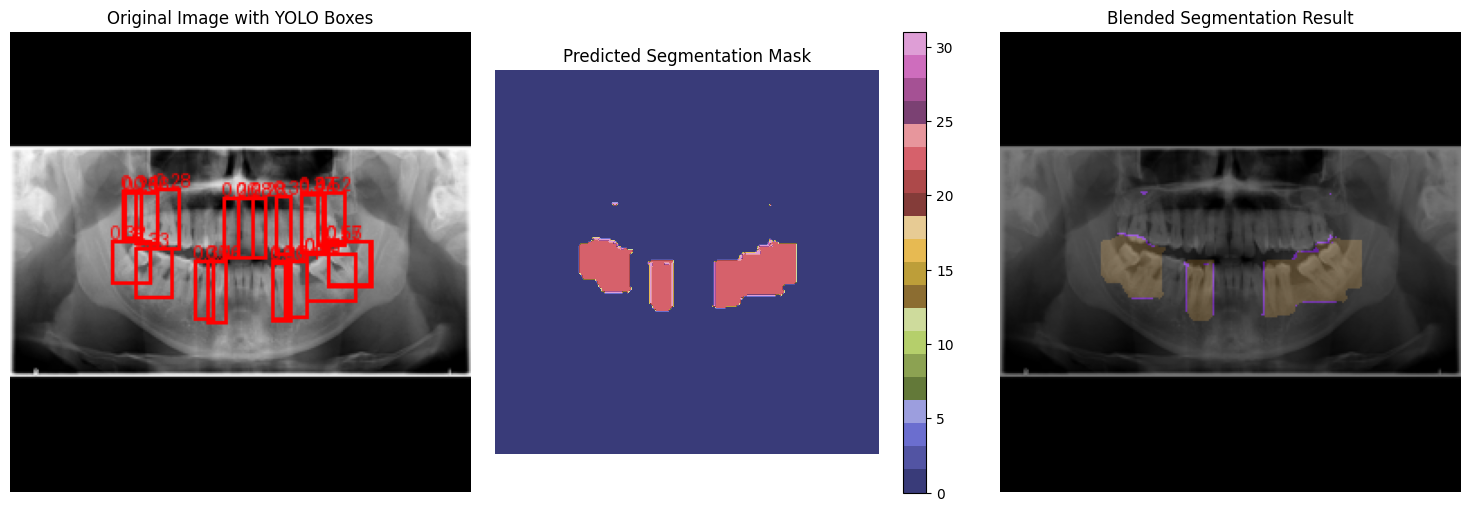


Detection Summary:
Total detections: 22
Average confidence: 0.375

Detections by class:
Class 0: 1 detection(s)
Class 3: 1 detection(s)
Class 5: 1 detection(s)
Class 7: 1 detection(s)
Class 8: 1 detection(s)
Class 9: 1 detection(s)
Class 13: 2 detection(s)
Class 14: 2 detection(s)
Class 15: 1 detection(s)
Class 18: 1 detection(s)
Class 19: 2 detection(s)
Class 20: 2 detection(s)
Class 22: 1 detection(s)
Class 23: 2 detection(s)
Class 30: 2 detection(s)
Class 31: 1 detection(s)


In [44]:
# Load models
yolo_model = YOLO(os.path.join(base_dir,'dental_teeth_yolov8.pt'))
# unet_model = ModifiedUNet(image_channels=1, bbox_channels=1, out_channels=33).to(device)
# unet_model.load_state_dict(torch.load('yolo_.pt'))

# Visualize predictions
predicted_mask, boxes = evaluate_and_visualize_yolo_unet(
    yolo_model=model,
    unet_model=bb_unet,
    image_path=os.path.join(base_dir, "xrays_2048_2048/train_0.png"),
    device=device,
    conf_threshold=0.25  # Adjust confidence threshold as needed
)

In [42]:
TOOTH_TYPE_MAPPING = {
    # Quadrant 1 (Upper Right)
    0: 'incisor',  # Central incisor
    1: 'incisor',  # Lateral incisor
    2: 'canine',   # Canine
    3: 'premolar', # First premolar
    4: 'premolar', # Second premolar
    5: 'molar',    # First molar
    6: 'molar',    # Second molar
    7: 'molar',    # Third molar

    # Quadrant 2 (Upper Left)
    8: 'incisor',  # Central incisor
    9: 'incisor',  # Lateral incisor
    10: 'canine',  # Canine
    11: 'premolar', # First premolar
    12: 'premolar', # Second premolar
    13: 'molar',    # First molar
    14: 'molar',    # Second molar
    15: 'molar',    # Third molar

    # Quadrant 3 (Lower Left)
    16: 'incisor',  # Central incisor
    17: 'incisor',  # Lateral incisor
    18: 'canine',   # Canine
    19: 'premolar', # First premolar
    20: 'premolar', # Second premolar
    21: 'molar',    # First molar
    22: 'molar',    # Second molar
    23: 'molar',    # Third molar

    # Quadrant 4 (Lower Right)
    24: 'incisor',  # Central incisor
    25: 'incisor',  # Lateral incisor
    26: 'canine',   # Canine
    27: 'premolar', # First premolar
    28: 'premolar', # Second premolar
    29: 'molar',    # First molar
    30: 'molar',    # Second molar
    31: 'molar',    # Third molar
}



def calculate_bb_unet_dice_scores(model, val_loader, device):
    """
    Calculate Dice scores for the BB-UNet model that takes both image and bounding box inputs.

    Args:
        model: BB-UNet model
        val_loader: DataLoader containing validation data (should yield image, bbox_mask, target_mask)
        device: torch device
    """
    model.eval()

    # Initialize dice scores for teeth only (0-31)
    class_dice_scores = {i: [] for i in range(32)}

    # Initialize dice scores by tooth type
    type_dice_scores = {
        'incisor': [],
        'canine': [],
        'premolar': [],
        'molar': []
    }

    with torch.no_grad():
        for images, bbox_masks, target_masks in val_loader:
            # Move everything to device
            images = images.to(device)
            bbox_masks = bbox_masks.to(device)
            target_masks = target_masks.to(device)

            # Forward pass with both inputs
            outputs = model(images, bbox_masks)
            pred_masks = torch.argmax(outputs, dim=1)

            # Calculate dice for each image in batch
            for pred, target in zip(pred_masks, target_masks):
                # Calculate dice for each tooth class (0-31)
                for tooth_idx in range(32):
                    pred_tooth = (pred == tooth_idx).float()
                    target_tooth = (target == tooth_idx).float()

                    intersection = (pred_tooth * target_tooth).sum()
                    union = pred_tooth.sum() + target_tooth.sum()

                    if union > 0:
                        dice = (2. * intersection) / (union + 1e-6)
                        class_dice_scores[tooth_idx].append(dice.item())

    # Calculate mean dice for each tooth
    mean_class_dice = {}
    for tooth_idx in range(32):
        if class_dice_scores[tooth_idx]:
            mean_class_dice[tooth_idx] = np.mean(class_dice_scores[tooth_idx])
        else:
            mean_class_dice[tooth_idx] = 0.0

        # Add to tooth type aggregation
        tooth_type = TOOTH_TYPE_MAPPING.get(tooth_idx)
        if tooth_type:
            type_dice_scores[tooth_type].append(mean_class_dice[tooth_idx])

    # Calculate mean dice for each tooth type
    mean_type_dice = {
        tooth_type: np.mean(scores) if scores else 0.0
        for tooth_type, scores in type_dice_scores.items()
    }

    # Calculate overall mean dice across all teeth
    overall_mean_dice = np.mean(list(mean_class_dice.values()))

    # Create detailed report
    print("\n=== BB-UNet Segmentation Performance Report ===")
    print(f"\nOverall Mean Dice Score: {overall_mean_dice:.4f}")

    print("\nDice Scores by Tooth Type:")
    for tooth_type, score in mean_type_dice.items():
        print(f"{tooth_type.capitalize():8}: {score:.4f}")

    print("\nDetailed Dice Scores by Individual Tooth:")
    print("\nQuadrant 1 (Upper Right):")
    for i in range(8):
        score = mean_class_dice[i]
        print(f"Tooth {i:2d} ({TOOTH_TYPE_MAPPING[i]:8}): {score:.4f}")

    print("\nQuadrant 2 (Upper Left):")
    for i in range(8, 16):
        score = mean_class_dice[i]
        print(f"Tooth {i:2d} ({TOOTH_TYPE_MAPPING[i]:8}): {score:.4f}")

    print("\nQuadrant 3 (Lower Left):")
    for i in range(16, 24):
        score = mean_class_dice[i]
        print(f"Tooth {i:2d} ({TOOTH_TYPE_MAPPING[i]:8}): {score:.4f}")

    print("\nQuadrant 4 (Lower Right):")
    for i in range(24, 32):
        score = mean_class_dice[i]
        print(f"Tooth {i:2d} ({TOOTH_TYPE_MAPPING[i]:8}): {score:.4f}")

    # Calculate additional statistics
    quadrant_scores = {
        'Upper Right': np.mean([mean_class_dice[i] for i in range(8)]),
        'Upper Left': np.mean([mean_class_dice[i] for i in range(8, 16)]),
        'Lower Left': np.mean([mean_class_dice[i] for i in range(16, 24)]),
        'Lower Right': np.mean([mean_class_dice[i] for i in range(24, 32)])
    }

    print("\nDice Scores by Quadrant:")
    for quadrant, score in quadrant_scores.items():
        print(f"{quadrant:11}: {score:.4f}")

    return {
        'overall_mean_dice': overall_mean_dice,
        'mean_class_dice': mean_class_dice,
        'mean_type_dice': mean_type_dice,
        'quadrant_scores': quadrant_scores
    }

In [43]:
# Example usage
results = calculate_bb_unet_dice_scores(
    model=bb_unet,
    val_loader=val_loader,
    device=device
)

# Access specific metrics
overall_dice = results['overall_mean_dice']
quadrant_performance = results['quadrant_scores']
tooth_type_performance = results['mean_type_dice']


image 1/1 /content/drive/MyDrive/training_data/quadrant_enumeration/xrays_2048_2048/train_101.png: 640x640 2 11s, 1 17, 1 21, 1 37, 1 45, 3 46s, 2 47s, 1 48, 7.5ms
Speed: 3.6ms preprocess, 7.5ms inference, 1.5ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /content/drive/MyDrive/training_data/quadrant_enumeration/xrays_2048_2048/train_222.png: 640x640 1 16, 2 17s, 1 18, 2 21s, 2 26s, 2 27s, 2 28s, 1 31, 1 35, 1 36, 2 37s, 1 41, 1 44, 2 46s, 2 47s, 8.9ms
Speed: 3.2ms preprocess, 8.9ms inference, 1.7ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /content/drive/MyDrive/training_data/quadrant_enumeration/xrays_2048_2048/train_593.png: 640x640 1 11, 1 16, 2 17s, 1 18, 2 21s, 1 22, 1 26, 1 27, 1 31, 1 32, 1 33, 1 34, 1 35, 1 44, 2 45s, 2 46s, 1 47, 2 48s, 7.4ms
Speed: 3.2ms preprocess, 7.4ms inference, 1.4ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /content/drive/MyDrive/training_data/quadrant_enumeration/xrays_2048_2048/train_294.png: 640x640 